## Importing libraries and getting data from database

In [665]:
%load_ext autoreload
%autoreload 2
#maths
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 999)

#mysql
import mysql.connector 
from mysql.connector import errorcode
from datetime import date, datetime, timedelta

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#stats
from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db_name = 'energydb'

In [572]:
import config

In [7]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.login,
    passwd = config.password,
    database = db_name
)
cursor = cnx.cursor(buffered=True)

#### Load data from database

In [5]:
query = "SELECT * FROM retail_price_adj"

In [11]:
cursor.execute(query)
df= pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]

In [ ]:
cursor.close()
cnx.close()

In [24]:
df

,dates,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,months
0,2001-01-01,8.025586,14.443157,9.199002,8.242885,12.617843,8.040072,14.138938,8.851323,9.199002,...,8.098019,9.995765,6.765250,15.862845,8.489157,6.939089,7.214335,8.547104,6.243732,1
1,2001-02-01,7.692393,14.370724,9.387328,8.112505,13.950612,8.387751,13.124875,7.793800,9.459761,...,7.982126,10.010252,7.619960,16.109118,8.735430,7.402661,7.228822,8.662997,6.316165,2
2,2001-03-01,8.503644,15.804899,9.517707,8.300831,14.327264,8.199425,13.588446,9.141055,9.170028,...,7.938666,10.169605,7.127415,15.703492,8.778890,7.779313,7.460608,8.590564,6.287192,3
3,2001-04-01,8.286345,15.341327,9.952306,8.749916,14.312777,8.561590,13.921639,9.141055,9.083109,...,7.982126,10.198578,7.808286,15.095054,8.764403,7.822773,7.243308,8.720943,6.171299,4
4,2001-05-01,8.112505,15.283381,11.386481,8.923756,14.225858,8.981702,13.863692,9.763980,10.922909,...,8.040072,10.633177,7.851746,15.297867,8.938242,7.562014,7.301255,8.662997,6.374111,5
5,2001-06-01,8.054559,15.326840,11.603780,9.459761,16.427823,9.387328,13.849205,10.444851,12.530923,...,8.126992,11.444427,7.866233,15.631059,9.372841,7.402661,7.417148,9.054135,6.330651,6
6,2001-07-01,8.416724,15.051595,11.270588,9.372841,19.513473,8.677483,14.167911,11.067775,13.081415,...,8.242885,11.560320,7.938666,15.978738,9.285921,7.750340,7.460608,9.097595,6.692817,7
7,2001-08-01,8.373264,15.616573,11.400967,9.532194,19.006441,8.894783,14.327264,11.198155,12.154271,...,8.184938,11.589293,7.924179,15.775925,9.517707,7.924179,7.446121,9.097595,6.634870,8
8,2001-09-01,8.054559,14.834295,11.256101,9.329381,19.020928,9.648087,14.052018,11.183668,12.241191,...,8.126992,11.082262,7.402661,15.587599,9.010676,7.982126,7.257795,8.851323,6.707303,9
9,2001-10-01,7.953153,16.210524,11.169181,8.213912,18.455950,9.155542,14.124451,10.213065,10.676636,...,7.996612,10.691123,7.706880,15.978738,8.836836,8.112505,7.344715,8.634023,6.663844,10


Adding column for months only

In [23]:
df['months']=df.dates.apply(lambda x: x.month)

Overview of the data

In [33]:
df_sum = pd.DataFrame(df.groupby('months').sum())
df_sum

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,GA,HI,ID,IL,IN,IA,KS,KY,LA,ME,MD,MA,MI,MN,MS,MO,MT,NE,NV,NH,NJ,NM,NY,NC,ND,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
months,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,174.082172,322.972350,183.596593,152.463524,283.269469,180.198778,337.294556,217.606951,232.886499,217.423692,180.480642,521.914241,142.459459,179.111876,162.955247,155.994571,172.376179,140.481768,162.999408,282.525950,228.653209,323.359280,205.828052,174.430093,178.792979,150.887950,168.673572,146.959846,193.396141,316.151629,271.405069,179.311294,313.931113,180.699752,147.163239,184.438955,148.889274,168.986536,208.276329,315.197396,179.013252,167.078605,175.459948,192.543691,146.116898,288.678035,176.235046,150.485241,150.297391,198.774230,137.574833
2,174.135371,322.460975,186.564803,153.216679,284.342192,183.784142,342.230587,218.884385,240.263637,221.237664,181.583606,518.504724,142.719171,181.674276,164.536131,156.569254,177.305084,142.333595,167.524605,284.168412,228.881568,327.951857,205.267723,177.173147,181.143345,153.812995,170.895771,152.065237,194.240892,320.000835,270.843513,181.144997,316.192495,183.564362,153.294754,185.633476,155.017543,169.455576,210.861698,324.015197,178.473298,170.055517,174.857389,193.856751,147.919650,289.781936,176.998082,152.830318,152.317736,200.330832,142.329208
3,173.483584,330.759495,186.593309,154.533924,280.490754,183.754214,338.500004,219.697986,236.760050,219.410017,180.880238,519.503172,142.515237,184.425739,165.138186,158.217034,180.452862,139.009645,172.294088,278.102439,226.353400,323.808844,205.461068,175.363583,181.707236,156.487551,171.938224,161.160834,194.215090,319.197460,269.708947,179.602499,312.151314,182.518127,154.118298,186.520616,154.663573,169.498350,208.706419,315.341232,174.461268,171.450007,175.762461,192.987022,148.596922,290.296553,176.732078,152.162429,152.237561,197.070433,142.241598
4,175.482003,331.142012,194.709548,154.171754,271.405873,187.351676,341.215073,219.646734,240.057962,219.667637,181.061327,519.715787,140.010712,184.469541,167.585673,158.518772,181.867100,139.610671,168.744366,265.807309,226.141155,318.490526,202.890647,176.117210,183.544654,159.150658,169.513724,156.729267,193.450957,318.972737,268.492922,176.932593,309.047659,180.871466,157.923363,186.539240,157.586311,167.806593,208.128639,307.149305,173.393638,173.777100,175.508378,192.065645,150.571514,289.565805,176.073374,149.896592,150.869360,199.368385,140.491407
5,178.354118,337.256634,215.079436,157.914079,293.819051,189.652241,340.953153,224.944290,247.495715,218.385366,184.729692,526.790936,141.617582,188.119024,166.850449,160.963850,186.129462,143.151374,171.790969,265.929955,229.477438,314.300891,208.138529,180.095409,186.209159,182.348734,172.525646,159.999883,195.831276,315.988627,275.356233,181.658815,317.374311,179.532762,162.652157,190.139683,160.315229,166.899049,208.050480,307.154745,175.714696,178.771149,176.032766,195.187640,158.202479,290.252612,178.707099,146.744584,150.983396,201.088850,143.459874
6,190.698685,337.960645,220.576331,168.761520,326.092460,199.353391,342.362484,233.588506,255.288989,219.272207,200.473448,537.840467,150.557617,193.763703,169.404255,180.453748,195.836620,153.898512,174.374321,266.546954,243.773003,327.400353,215.376203,194.663978,192.460597,202.947142,172.534619,176.261044,212.202630,313.902170,301.122657,194.525083,339.284788,185.069088,172.041165,195.991136,176.494873,166.217663,213.738844,306.317656,186.458631,184.684495,183.011751,206.380348,168.971232,292.530521,184.722311,146.653786,151.812532,208.296184,143.295258
7,191.955901,343.279961,222.941277,172.681694,341.133218,200.362867,340.614550,234.244395,252.809704,221.287244,206.845320,540.587712,149.495777,197.707798,172.156544,194.644672,200.406176,156.501580,179.365618,270.804131,245.466605,329.082417,222.096837,199.164380,192.796533,205.174980,175.866118,185.308505,225.772543,313.804899,307.574965,199.027164,354.804490,193.341693,171.783537,200.450885,180.067269,1

In [30]:
df_mean = pd.DataFrame(df.groupby('months').mean())
df_mean

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
months,,,,,,,,,,,,,,,,,,,,,
1,9.162220,16.998545,9.662979,8.024396,14.908919,9.484146,17.752345,11.452997,12.257184,11.443352,...,8.793611,9.234734,10.133878,7.690363,15.193581,9.275529,7.920276,7.910389,10.461802,7.240781
2,9.165020,16.971630,9.819200,8.064036,14.965379,9.672850,18.012136,11.520231,12.645455,11.644088,...,8.950290,9.203020,10.202987,7.785245,15.251681,9.315689,8.043701,8.016723,10.543728,7.491011
3,9.130715,17.408394,9.820700,8.133364,14.762671,9.671274,17.815790,11.563052,12.461055,11.547896,...,9.023685,9.250656,10.157212,7.820891,15.278766,9.301688,8.008549,8.012503,10.372128,7.486400
4,9.235895,17.428527,10.247871,8.114303,14.284520,9.860615,17.958688,11.560354,12.634630,11.561455,...,9.146163,9.237283,10.108718,7.924817,15.240306,9.267020,7.889294,7.940493,10.493073,7.394285
5,9.387059,17.750349,11.319970,8.311267,15.464161,9.981697,17.944903,11.839173,13.026090,11.493967,...,9.409008,9.264882,10.273034,8.326446,15.276453,9.405637,7.723399,7.946495,10.583624,7.550520
6,10.036773,17.787402,11.609281,8.882185,17.162761,10.492284,18.019078,12.294132,13.436263,11.540642,...,9.720237,9.632197,10.862124,8.893223,15.396343,9.722227,7.718620,7.990133,10.962957,7.541856
7,10.102942,18.067366,11.733751,9.088510,17.954380,10.545414,17.927082,12.328652,13.305774,11.646697,...,9.853022,9.706219,10.951998,9.007068,15.381167,9.916951,7.836942,8.067385,11.117744,7.622014
8,10.167380,17.561932,11.676281,9.144781,17.716167,10.508816,17.934908,12.508389,13.386614,11.782488,...,9.728644,9.623447,11.083246,8.867517,15.330264,9.908964,7.869933,8.062354,11.006451,7.531829
9,9.926292,17.259087,11.457034,8.978834,17.258531,10.506881,17.842095,12.403913,13.651671,11.824362,...,9.710671,9.565551,10.823364,8.739576,15.306798,9.669507,7.877031,7.948991,10.878857,7.580942


In [31]:
df_std = pd.DataFrame(df.groupby('months').std())
df_std

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
months,,,,,,,,,,,,,,,,,,,,,
1,0.994806,1.979866,0.450940,0.546717,0.930571,0.668666,2.634532,1.789393,2.220337,0.975496,...,0.709904,0.930471,1.325089,0.606764,0.543426,0.744935,0.459657,1.109066,1.035020,0.881892
2,0.998997,1.887478,0.444453,0.530629,0.852540,0.691932,2.754635,1.912220,2.111148,1.002147,...,0.696677,0.893209,1.292008,0.616372,0.544311,0.787691,0.271616,1.129319,1.047813,0.895964
3,0.863479,1.851260,0.431815,0.484519,0.812329,0.717943,2.661694,1.798756,2.355587,1.015448,...,0.691618,0.948121,1.344632,0.596076,0.464906,0.721016,0.245594,1.081820,1.024868,0.920130
4,0.821911,1.983801,0.520579,0.431522,0.871881,0.702828,2.550226,1.764060,2.190388,0.964641,...,0.708225,0.844478,1.404333,0.454196,0.504145,0.657610,0.248359,1.076669,0.937883,0.898269
5,0.927128,1.934420,0.407662,0.424151,0.898527,0.616248,2.468861,1.789108,1.455165,0.997177,...,0.702695,0.814581,1.439685,0.613549,0.491070,0.649380,0.262567,1.046457,0.994689,0.860351
6,1.035676,2.043838,0.454505,0.470904,0.816091,0.830578,2.412736,1.743525,1.638136,1.082330,...,0.677752,0.991842,1.646908,0.762534,0.482387,0.644860,0.288425,1.142209,1.030505,0.856555
7,0.937247,2.123953,0.589100,0.468718,1.130575,0.984463,2.321231,1.741714,1.656457,1.043108,...,0.677202,1.071705,1.662371,0.747093,0.499455,0.599410,0.234210,1.050052,1.033589,0.771818
8,0.980922,1.849124,0.495263,0.508375,0.939999,0.992360,2.497295,1.662964,1.618329,1.057281,...,0.726781,1.002508,1.633072,0.735676,0.468069,0.593546,0.208592,1.067335,1.026948,0.821165
9,0.959305,1.839501,0.402309,0.521906,1.228228,0.831181,2.581916,1.650144,1.721025,1.014223,...,0.711229,1.040025,1.576777,0.756436,0.449226,0.635324,0.205875,1.042157,1.047271,0.790770


#### Picking North and South states for the analysis

In [141]:
N_states = ['months','WA', 'ID', 'ND', 'MN', 'MI', 'WI', 'MO', 'MA', 'NY', 'OH', 'VT', 'NH']
S_states = ['months','AR', 'NM', 'TX', 'OK', 'AZ', 'LA', 'MS', 'FL', 'AL', 'GA', 'SC', 'TN']

In [142]:
N_df = df[N_states]

In [143]:
N_df

,months,WA,ID,ND,MN,MI,WI,MO,MA,NY,OH,VT,NH
0,1,6.939089,6.417571,7.286768,8.025586,10.169605,8.547104,7.619960,15.790412,16.703069,9.097595,15.862845,17.050748
1,2,7.402661,6.518977,7.648934,8.445697,10.010252,8.662997,7.750340,15.833872,16.181551,9.213488,16.109118,16.384363
2,3,7.779313,6.359625,7.562014,8.242885,10.111658,8.590564,7.924179,16.152578,15.949765,9.112082,15.703492,16.703069
3,4,7.822773,6.345138,7.735853,8.257371,9.749493,8.720943,7.866233,16.688582,15.500680,9.372841,15.095054,17.021775
4,5,7.562014,7.417148,8.083532,8.634023,9.865386,8.662997,9.010676,16.587176,15.891818,9.995765,15.297867,15.051595
5,6,7.402661,7.127415,8.532617,9.314894,10.271011,9.054135,10.242038,17.543293,16.601663,9.995765,15.631059,15.442733
6,7,7.750340,7.315741,8.677483,9.908846,10.459337,9.097595,10.546257,19.339633,19.209254,10.097172,15.978738,16.051171
7,8,7.924179,7.489581,8.720943,9.966792,10.560744,9.097595,10.256525,14.819809,18.383516,10.097172,15.775925,15.355814
8,9,7.982126,7.040496,8.576077,8.416724,9.966792,8.851323,8.880296,18.876061,17.412913,9.778466,15.587599,14.544563
9,10,8.112505,7.431634,8.054559,7.880719,9.879873,8.634023,8.083532,17.456373,17.137667,9.590140,15.978738,15.935278


In [73]:
S_df = df[S_states]

### Overview of prices distribution in Northern States

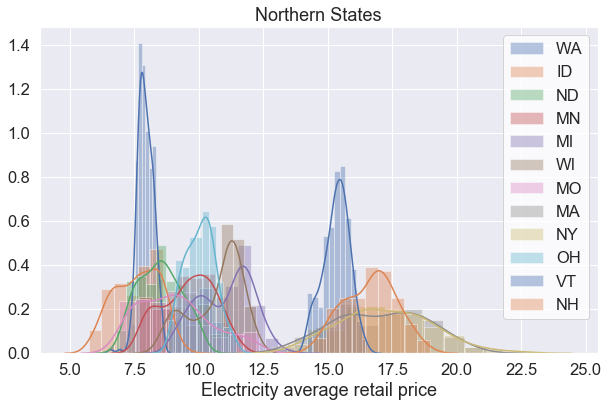

In [391]:
plt.figure(figsize=(10,6))
for state in N_sta:
    sns.distplot(N_df[state], label=state,norm_hist=True)
plt.xlabel("Electricity average retail price")
plt.title("Northern States")
plt.legend(facecolor='white')

Due to an evident split of distribution in NE and NW states I divided them in two separate groups

In [144]:
N_sta = ['WA', 'ID', 'ND', 'MN', 'MI', 'WI', 'MO', 'MA', 'NY', 'OH', 'VT', 'NH']

In [147]:
NE_sta = ['NY', 'MA', 'VT', 'NH']

In [160]:
N_W_sta = ['WA', 'ID', 'ND', 'MN', 'MI', 'WI', 'MO', "OH"]

#### NE States EDA

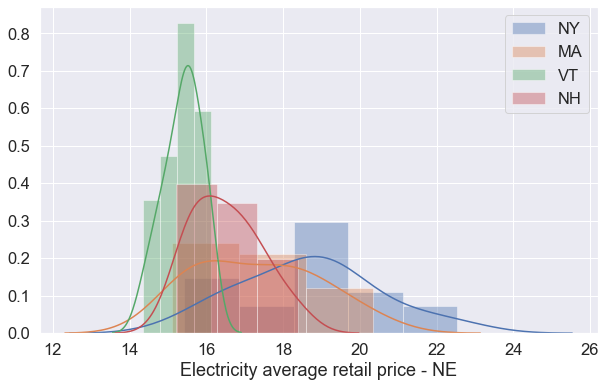

In [623]:
plt.figure(figsize=(10,6))
for state in NE_sta:
    sns.distplot(N_df[state].loc[N_df.months==7], label=state)
plt.xlabel("Electricity average retail price - NE")
plt.legend()

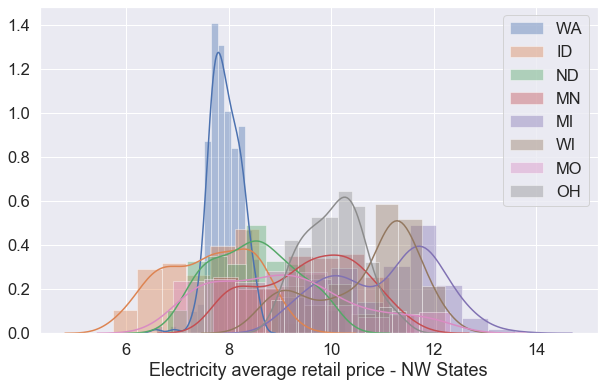

In [624]:
plt.figure(figsize=(10,6))
for state in N_W_sta:
    sns.distplot(N_df[state], label=state)
plt.xlabel("Electricity average retail price - NW States")
plt.legend()

**NE States** price distribution in winter and summer

In [156]:
NE_df = pd.melt(N_df, id_vars = ['months'], value_vars=NE_sta)
NE_df

,months,variable,value
0,1,NY,16.703069
1,2,NY,16.181551
2,3,NY,15.949765
3,4,NY,15.500680
4,5,NY,15.891818
5,6,NY,16.601663
6,7,NY,19.209254
7,8,NY,18.383516
8,9,NY,17.412913
9,10,NY,17.137667


In [220]:
summer_NE = NE_df[(NE_df.months == 6)|(NE_df.months == 7)|(NE_df.months == 8)]
summer_NE

,months,variable,value
5,6,NY,16.601663
6,7,NY,19.209254
7,8,NY,18.383516
17,6,NY,16.428838
18,7,NY,17.526946
19,8,NY,17.341551
29,6,NY,17.861455
30,7,NY,18.795661
31,8,NY,18.712000
41,6,NY,17.452462


In [221]:
winter_NE = NE_df[(NE_df.months == 12)|(NE_df.months == 1)|(NE_df.months == 2)]
winter_NE

,months,variable,value
0,1,NY,16.703069
1,2,NY,16.181551
11,12,NY,15.746952
12,1,NY,15.216641
13,2,NY,14.731762
23,12,NY,15.459080
24,1,NY,15.407422
25,2,NY,16.076704
35,12,NY,16.271911
36,1,NY,15.781915


(5, 23)

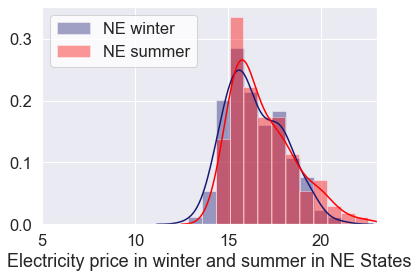

In [632]:
sns.distplot(winter_NE["value"], label = 'NE winter', color = 'midnightblue')
sns.distplot(summer_NE["value"], label = 'NE summer', color = 'red')
plt.xlabel("Electricity price in winter and summer in NE States")
plt.legend(facecolor='white')
plt.xlim(5,23)

Text(0, 0.5, 'Average retail price [cent/kWh]')

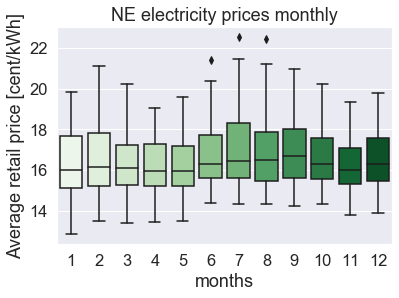

In [636]:
# NE_df.boxplot(by='months')
plt.title('NE electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = NE_df, palette="Greens") 
plt.ylabel("Average retail price [cent/kWh]")

#### NW States EDA

In [161]:
N_W_df = pd.melt(N_df, id_vars = ['months'], value_vars=N_W_sta)
N_W_df

,months,variable,value
0,1,WA,6.939089
1,2,WA,7.402661
2,3,WA,7.779313
3,4,WA,7.822773
4,5,WA,7.562014
5,6,WA,7.402661
6,7,WA,7.750340
7,8,WA,7.924179
8,9,WA,7.982126
9,10,WA,8.112505


**NW States** price distribution in winter and summer

In [211]:
summer_N_W = N_W_df[(N_W_df.months == 6)|(N_W_df.months == 7)|(N_W_df.months == 8)]
summer_N_W

,months,variable,value
5,6,WA,7.402661
6,7,WA,7.750340
7,8,WA,7.924179
17,6,WA,8.328508
18,7,WA,8.200158
19,8,WA,8.114591
29,6,WA,8.059267
30,7,WA,8.115040
31,8,WA,8.128984
41,6,WA,7.605742


In [212]:
winter_N_W = N_W_df[(N_W_df.months == 12)|(N_W_df.months == 1)|(N_W_df.months == 2)]
winter_N_W

,months,variable,value
0,1,WA,6.939089
1,2,WA,7.402661
11,12,WA,8.271858
12,1,WA,8.471120
13,2,WA,8.528164
23,12,WA,8.585209
24,1,WA,8.366021
25,2,WA,8.352078
35,12,WA,8.212644
36,1,WA,8.094683


(5, 23)

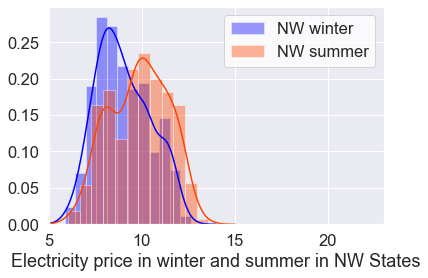

In [633]:
sns.distplot(winter_N_W["value"], label = 'NW winter', color= 'blue')
sns.distplot(summer_N_W["value"], label = 'NW summer', color = 'orangered')
plt.xlabel("Electricity price in winter and summer in NW States")
plt.legend(facecolor='white')
plt.xlim(5,23)

Text(0, 0.5, 'Average retail price [cent/kWh]')

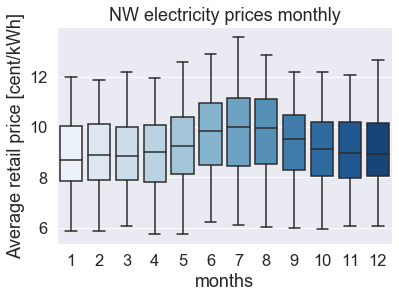

In [637]:
# N_W_df.boxplot(by='months')
plt.title('NW electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = N_W_df, palette="Blues") 
plt.ylabel("Average retail price [cent/kWh]")

### Overview of prices distribution in Southern States

In [95]:
S_sta = ['AR', 'NM', 'TX', 'OK', 'AZ', 'LA', 'MS', 'FL', 'AL', 'GA', 'SC', 'TN']

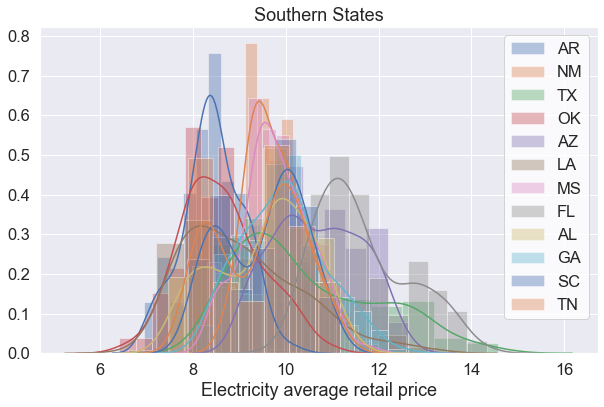

In [650]:
plt.figure(figsize=(10,6))
for state in S_sta:
    sns.distplot(S_df[state], label=state,norm_hist=True)
plt.xlabel("Electricity average retail price")
plt.title("Southern States")
plt.legend(facecolor='white')

In [96]:
South_df = pd.melt(S_df, id_vars = ['months'], value_vars = S_sta)
South_df

,months,variable,value
0,1,AR,8.242885
1,2,AR,8.112505
2,3,AR,8.300831
3,4,AR,8.749916
4,5,AR,8.923756
5,6,AR,9.459761
6,7,AR,9.372841
7,8,AR,9.532194
8,9,AR,9.329381
9,10,AR,8.213912


In [154]:
winter_south = South_df[(South_df.months==12)|(South_df.months == 1)|(South_df.months == 2)]

In [209]:
winter_south['value'].describe()

count    672.000000
mean       9.401130
std        1.242723
min        6.604442
25%        8.423625
50%        9.406657
75%       10.088392
max       14.326501
Name: value, dtype: float64

In [208]:
summer_south = South_df[(South_df.months==6)|(South_df.months == 7)|(South_df.months == 8)]
summer_south['value'].describe()

count    672.000000
mean      10.267897
std        1.239398
min        7.241024
25%        9.326408
50%       10.295161
75%       11.022069
max       14.561518
Name: value, dtype: float64

(5, 23)

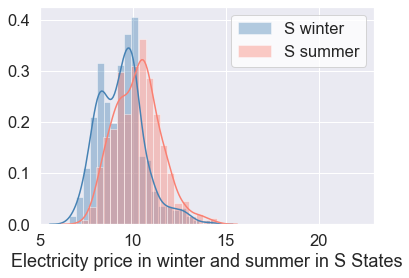

In [641]:
sns.distplot(winter_south["value"], label = 'S winter', color = 'steelblue')
sns.distplot(summer_south["value"], label = 'S summer',color = 'salmon')
plt.xlabel("Electricity price in winter and summer in S States")
plt.legend(facecolor='white')
plt.xlim(5,23)

Text(0, 0.5, 'Average retail price [cent/kWh]')

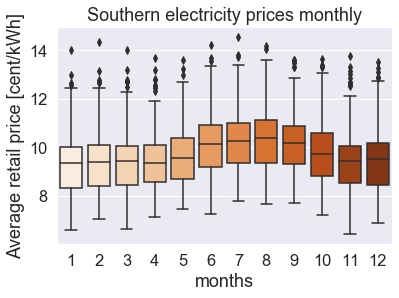

In [640]:
plt.title('Southern electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = South_df, palette="Oranges") 
plt.ylabel("Average retail price [cent/kWh]")

(5, 23)

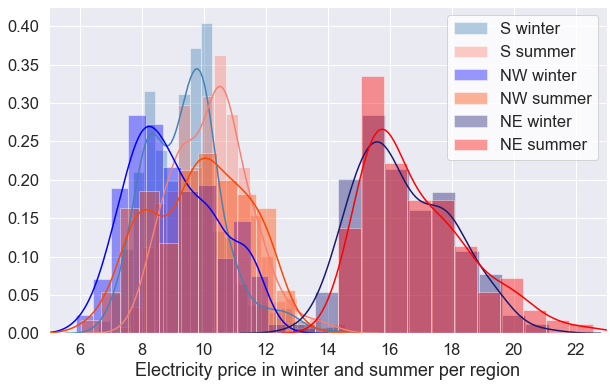

In [409]:
plt.figure(figsize=(10,6))
sns.distplot(winter_south["value"], label = 'S winter', color = 'steelblue')
sns.distplot(summer_south["value"], label = 'S summer',color = 'salmon')
sns.distplot(winter_N_W["value"], label = 'NW winter', color= 'blue')
sns.distplot(summer_N_W["value"], label = 'NW summer', color = 'orangered')
sns.distplot(winter_NE["value"], label = 'NE winter', color = 'midnightblue')
sns.distplot(summer_NE["value"], label = 'NE summer', color = 'red')
plt.xlabel("Electricity price in winter and summer per region")
plt.legend(facecolor='white')
plt.xlim(5,23)

## Hypothesis testing

### Comparison of electricity prices in winter vs summer per region

Creating sampling distribution of the mean for **Southern States** for winter and summer

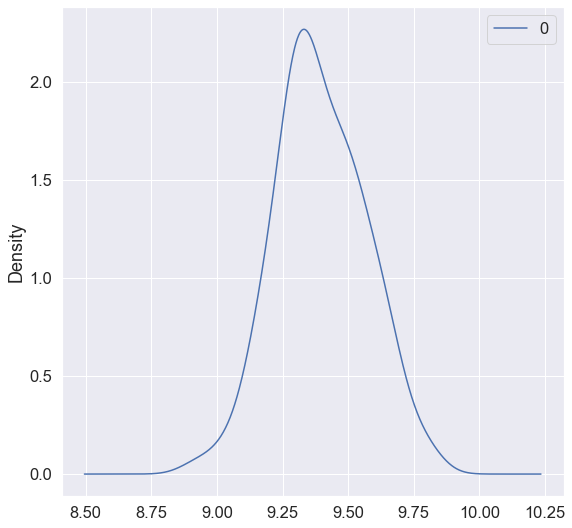

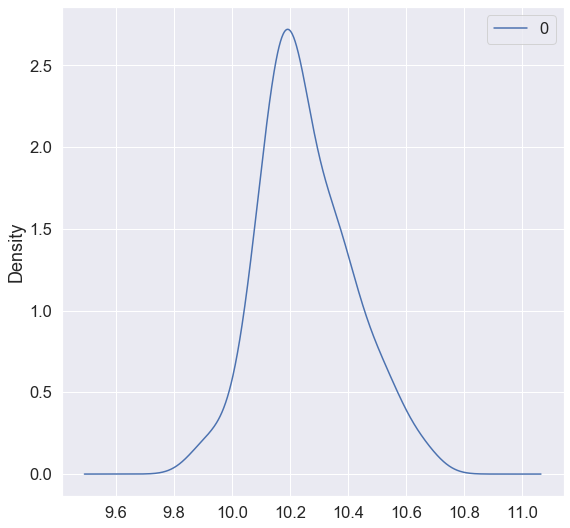

In [368]:
np.random.seed(42)

point_estimates_winter = []         # Make empty list to hold point estimates
point_estimates_summer = []
# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates
sample_size = 50

for i in range(100):
    sample = np.random.choice(winter_south['value'], sample_size)
    sample_s = np.random.choice(summer_south['value'], sample_size)
    sample_mean = np.mean(sample)
    sample_mean_s = np.mean(sample_s)
    point_estimates_winter.append(sample_mean)
    point_estimates_summer.append(sample_mean_s)
df_wS = pd.DataFrame(point_estimates_winter)
df_sS = pd.DataFrame(point_estimates_summer)
df_wS.plot(kind="density",  # Plot sample mean density
        figsize=(9,9), label = 'winter')
df_sS.plot(kind="density",  # Plot sample mean density
        figsize=(9,9), label = 'summer')
plt.legend()

Long way to calculate t-statistics

In [454]:
def sample_variance(sample):
    var = (np.std(sample, ddof = 1))**2
    return var
def pooled_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    v1 = sample_variance(sample1)
    v2 = sample_variance(sample2)
    pooled = ((n1-1)*v1 + (n2-1)*v2)/(n1+n2-2)
    return pooled
def twosample_tstatistic(expr, ctrl):
    x1_bar = expr.mean()
    x2_bar = ctrl.mean()
    t_value = (x1_bar - x2_bar)/np.sqrt(pooled_variance(expr,ctrl) *(1/len(expr)+1/len(ctrl)))
    return t_value

t_stat = twosample_tstatistic(df_sS, df_wS)[0]
t_stat

37.36702550852845

In [437]:
def visualize_t(t_stat, n_control, n_experimental):
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    # initialize a matplotlib "figure"
    plt.figure(figsize=(5,3))
    # generate points on the x axis between -4 and 4:
    xs = np.arange(-4,4,0.01)
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys = stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    # Draw two sided boundary for critical-t
    plt.plot(xs,ys, label = 'pdf')
    plt.axvline(crit, color = 'red', lw=2)
    plt.axvline(-crit, color = 'red', lw=2,label = "Tcrit")
    plt.axvline(t_stat, color = 'black', linestyle = '--',lw=2, label = "Tstat")
    plt.ylim(0,0.4)
    plt.xlabel("Tvalue")
    plt.legend()
    return plt.show()

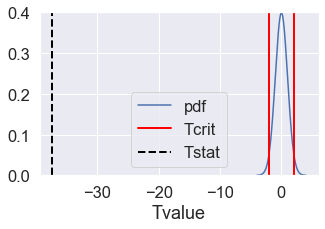

In [456]:
n_control = len(df_sS)
n_experimental = len(df_wS)
visualize_t(-t_stat, n_control, n_experimental)

Short way to do the same thing that

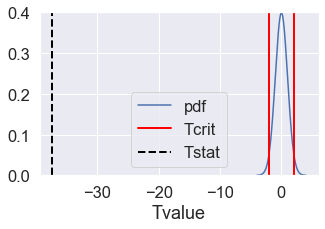

In [642]:
n_control = len(df_sS)
n_experimental = len(df_wS)
visualize_t(stats.ttest_ind(df_wS[0],df_sS[0])[0], n_control, n_experimental)

Verification of normal distribution

In [643]:
stat, p = shapiro(df_sS[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.979, p=0.112
Sample looks Gaussian (fail to reject H0)


In [644]:
stat, p = shapiro(df_wS[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.783
Sample looks Gaussian (fail to reject H0)


Creating sampling distribution of the mean for **NW States** for winter and summer

In [440]:
np.random.seed(42)

point_estimates_winter = []         # Make empty list to hold point estimates
point_estimates_summer = []
# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates
sample_size = 50

for i in range(100):
    sample = np.random.choice(winter_N_W['value'], sample_size)
    sample_s = np.random.choice(summer_N_W['value'], sample_size)
    sample_mean = np.mean(sample)
    sample_mean_s = np.mean(sample_s)
    point_estimates_winter.append(sample_mean)
    point_estimates_summer.append(sample_mean_s)
df_w_NW = pd.DataFrame(point_estimates_winter)
df_s_NW = pd.DataFrame(point_estimates_summer)

In [414]:
stats.ttest_ind(df_w_NW[0],df_s_NW[0])

Ttest_indResult(statistic=-29.81118664563882, pvalue=3.8992348587545285e-75)

In [441]:
t_stat = twosample_tstatistic(df_w_NW, df_s_NW)[0]
t_stat

-29.811186645638823

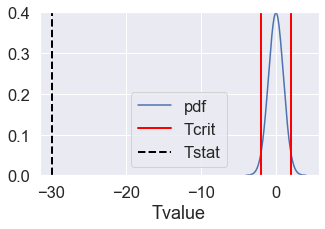

In [443]:
n_control = len(df_w_NW)
n_experimental = len(df_s_NW)
visualize_t(t_stat, n_control, n_experimental)

Anova testing for raw data

In [ ]:
summer_N_W['season'] = 'summer'
winter_N_W['season'] = 'winter'
N_W_winter_summer_anova = summer_N_W.append(winter_N_W)
N_W_winter_summer_anova

In [656]:
mod = ols("value~season",data=N_W_winter_summer_anova).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,155.991261,155.991261,69.361752,3.058131e-16
Residual,894.0,2010.563215,2.248952,NaN,NaN


Verification of normal distribution

In [645]:
stat, p = shapiro(df_w_NW[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.644
Sample looks Gaussian (fail to reject H0)


In [647]:
stat, p = shapiro(df_s_NW[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.982, p=0.201
Sample looks Gaussian (fail to reject H0)


Creating sampling distribution of the mean for **NE States** for winter and summer

In [509]:
np.random.seed(42)

point_estimates_winter = []         # Make empty list to hold point estimates
point_estimates_summer = []
# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates
sample_size = 50

for i in range(100):
    sample = np.random.choice(winter_NE['value'], sample_size)
    sample_s = np.random.choice(summer_NE['value'], sample_size)
    sample_mean = np.mean(sample)
    sample_mean_s = np.mean(sample_s)
    point_estimates_winter.append(sample_mean)
    point_estimates_summer.append(sample_mean_s)
df_w_NE = pd.DataFrame(point_estimates_winter)
df_s_NE = pd.DataFrame(point_estimates_summer)
# df_w_NW.plot(kind="density",  # Plot sample mean density
#         figsize=(9,9), label = 'winter')
# df_s_NW.plot(kind="density",  # Plot sample mean density
#         figsize=(9,9), label = 'summer')
# plt.legend()

In [510]:
stats.ttest_ind(df_w_NE[0],df_s_NE[0])

Ttest_indResult(statistic=-13.011578132553817, pvalue=2.245856062930203e-28)

In [648]:
t_stat = twosample_tstatistic(df_w_NE, df_s_NE)[0]
t_stat

-13.01157813255371

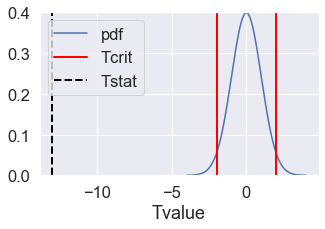

In [649]:
n_control = len(winter_NE)
n_experimental = len(df_s_NE)
visualize_t(t_stat, n_control, n_experimental)

Anova testing for raw data

In [658]:
summer_NE['season'] = 'summer'
winter_NE['season'] = 'winter'
NE_winter_summer_anova = summer_NE.append(winter_NE)
NE_winter_summer_anova

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,months,variable,value,season
5,6,NY,16.601663,summer
6,7,NY,19.209254,summer
7,8,NY,18.383516,summer
17,6,NY,16.428838,summer
18,7,NY,17.526946,summer
19,8,NY,17.341551,summer
29,6,NY,17.861455,summer
30,7,NY,18.795661,summer
31,8,NY,18.712000,summer
41,6,NY,17.452462,summer


In [659]:
mod = ols("value~season",data=NE_winter_summer_anova).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,19.900549,19.900549,7.465191,0.00654
Residual,446.0,1188.937425,2.665779,NaN,NaN


In [502]:
print(pairwise_tukeyhsd(NE_winter_summer_anova['value'], NE_winter_summer_anova['season']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
summer winter  -0.4215 0.0065 -0.7247 -0.1183   True
----------------------------------------------------


Anova testing for sample distribution of the mean of data

In [661]:
df_s_NE['season'] = 'summer'
df_w_NE['season'] = 'winter'
NE_winter_summer_anova_sdm = df_s_NE.append(df_w_NE)
NE_winter_summer_anova_sdm.columns = ["value", "season"]

In [662]:
mod = ols("value~season",data=NE_winter_summer_anova_sdm).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,9.340347,9.340347,169.301165,2.245856e-28
Residual,198.0,10.923662,0.055170,NaN,NaN


In [663]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.25e-28
Time:                        13:20:29   Log-Likelihood:                 6.9509
No. Observations:                 200   AIC:                            -9.902
Df Residuals:                     198   BIC:                            -3.305
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.8615      0.023    717.869      0.000      16.815      16.908
season[T.winter]    -0.4322      0.033    -13.012      0.000      -0.498      -0.367
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.964
Skew:                           0.005   Prob(JB):                        0.617
Kurtosis:                       2.660   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same check with pairwise Tukey test

In [660]:
print(pairwise_tukeyhsd(NE_winter_summer_anova['value'], NE_winter_summer_anova['season']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
summer winter  -0.4215 0.0065 -0.7247 -0.1183   True
----------------------------------------------------


Plot of all seasons in **all states**

(0, 3)

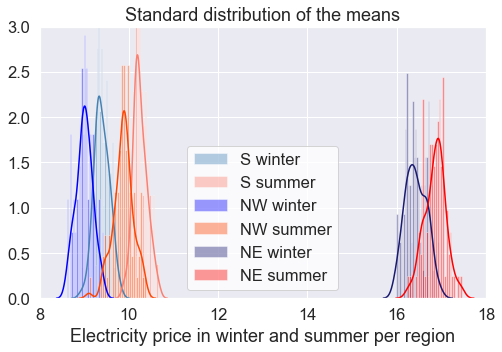

In [655]:
plt.figure(figsize=(8,5))
sns.distplot(df_wS[0], label = 'S winter', color = 'steelblue', bins=30)
sns.distplot(df_sS[0], label = 'S summer',color = 'salmon',bins=30)
sns.distplot(df_w_NW[0], label = 'NW winter', color= 'blue',bins=30)
sns.distplot(df_s_NW[0], label = 'NW summer', color = 'orangered',bins=30)
sns.distplot(df_w_NE[0], label = 'NE winter', color = 'midnightblue',bins=30)
sns.distplot(df_s_NE[0], label = 'NE summer', color = 'red',bins=30)
plt.xlabel("Electricity price in winter and summer per region")
plt.title("Standard distribution of the means")
plt.legend(facecolor='white')
plt.xlim(8,18)
plt.ylim(0,3)

### Comparison of electricity prices in winter in S vs NE States

In [258]:
np.random.seed(42)

point_estimates_winter_S = []         # Make empty list to hold point estimates
point_estimates_winter_NE = []
# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates
sample_size = 50

for i in range(100):
    sample = np.random.choice(winter_south['value'], sample_size)
    sample_s = np.random.choice(winter_NE['value'], sample_size)
    sample_mean = np.mean(sample)
    sample_mean_s = np.mean(sample_s)
    point_estimates_winter_S.append(sample_mean)
    point_estimates_winter_NE.append(sample_mean_s)
df_wS = pd.DataFrame(point_estimates_winter_S)
df_wNE = pd.DataFrame(point_estimates_winter_NE)

In [654]:
t_stat = twosample_tstatistic(df_wNE, df_wS)[0]
t_stat

268.2735763721591

In [653]:
stats.ttest_ind(df_wNE[0],df_wS[0])

Ttest_indResult(statistic=268.27357637215937, pvalue=1.4026754450000985e-255)

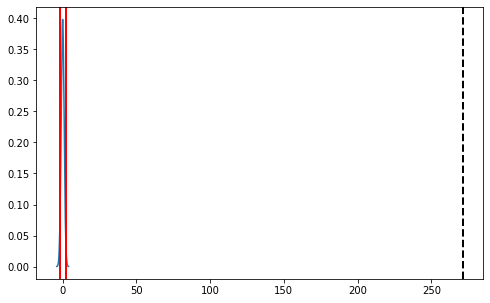

In [260]:
n_control = len(df_wS)
n_experimental = len(df_wNE)
visualize_t(t_stat, n_control, n_experimental)

### Comparison of electricity prices in winter in S vs NW States

In [352]:
np.random.seed(42)

point_estimates_winter_S = []         # Make empty list to hold point estimates
point_estimates_winter_NW = []
# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates
sample_size = 50

for i in range(100):
    sample = np.random.choice(winter_south['value'], sample_size)
    sample_s = np.random.choice(winter_N_W['value'], sample_size)
    sample_mean = np.mean(sample)
    sample_mean_s = np.mean(sample_s)
    point_estimates_winter_S.append(sample_mean)
    point_estimates_winter_NW.append(sample_mean_s)
df_wS = pd.DataFrame(point_estimates_winter_S)
df_wNW = pd.DataFrame(point_estimates_winter_NW)

In [353]:
t_stat = twosample_tstatistic(df_wNW, df_wS)[0]
t_stat

-14.829584940588473

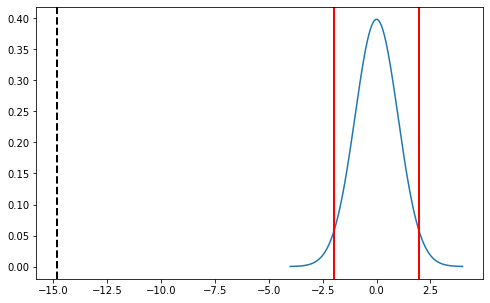

In [273]:
n_control = len(df_wS)
n_experimental = len(df_wNW)
visualize_t(t_stat, n_control, n_experimental)

In [354]:
stats.ttest_ind(df_wNW[0],df_wS[0])

Ttest_indResult(statistic=-14.829584940588473, pvalue=5.922751040314591e-34)

Comparison of sampling distribution vs raw data

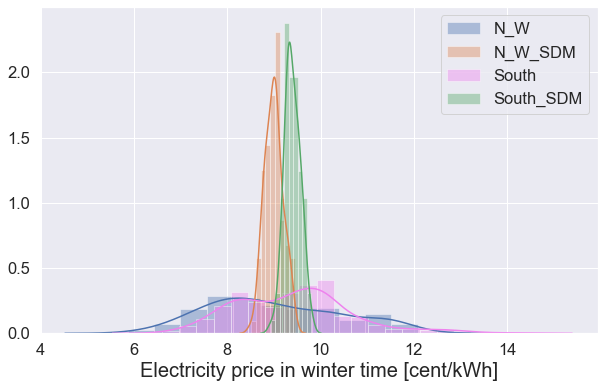

In [528]:
sns.set(font_scale=1.5)
# sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
sns.distplot(winter_N_W['value'], label = "N_W")
sns.distplot(df_wNW[0], label='N_W_SDM', bins='auto')
sns.distplot(winter_south['value'], label = 'South', color= 'violet')
sns.distplot(df_wS[0],label='South_SDM', bins='auto')
plt.xlabel("Electricity price in winter time [cent/kWh]", fontsize = 20)
plt.legend()

### Comparison of electricity prices in winter in NE vs NW States

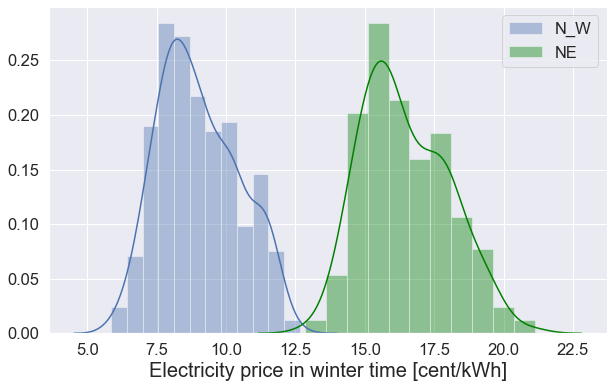

In [376]:
sns.set(font_scale=1.5)
# sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
sns.distplot(winter_N_W['value'], label = "N_W")
sns.distplot(winter_NE['value'], label = 'NE', color = 'green')
plt.xlabel("Electricity price in winter time [cent/kWh]", fontsize = 20)
plt.legend()

In [577]:
summer_south['season'] = 'summer'
winter_south['season'] = 'winter'
S_winter_summer_anova = summer_south.append(winter_south)
S_winter_summer_anova

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,months,variable,value,season
5,6,AR,9.459761,summer
6,7,AR,9.372841,summer
7,8,AR,9.532194,summer
17,6,AR,8.357030,summer
18,7,AR,8.670776,summer
19,8,AR,8.670776,summer
29,6,AR,8.463625,summer
30,7,AR,8.714605,summer
31,8,AR,8.617002,summer
41,6,AR,8.379898,summer


In [591]:
mod = ols("value~season",data=S_winter_summer_anova).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,252.432296,252.432296,163.892214,1.734735e-35
Residual,1342.0,2066.993500,1.540234,NaN,NaN


In [592]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           1.73e-35
Time:                        13:09:54   Log-Likelihood:                -2196.3
No. Observations:                1344   AIC:                             4397.
Df Residuals:                    1342   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.2679      0.048    214.473      0.000      10.174      10.362
season[T.winter]    -0.8668      0.068    -12.802      0.000      -1.000      -0.734
==============================================================================
Omnibus:                       54.955   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.762
Skew:                           0.483   Prob(JB):                     3.88e-14
Kurtosis:                       3.412   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparison of mothly electricity prices in States

Monthly changes of prices in **NE States**

Text(0, 0.5, 'Average retail price [cent/kWh]')

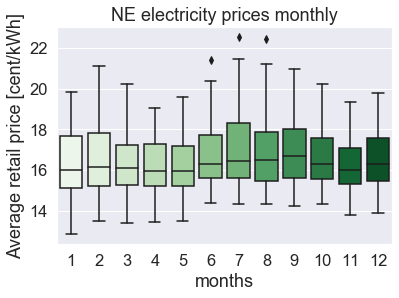

In [664]:
# NE_df.boxplot(by='months')
plt.title('NE electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = NE_df, palette="Greens") 
plt.ylabel("Average retail price [cent/kWh]")

In [595]:
mod = ols("value~months",data=NE_df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
months,1.0,6.428567,6.428567,2.622832,0.105691
Residual,890.0,2181.391613,2.451002,NaN,NaN


In [596]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.623
Date:                Fri, 04 Oct 2019   Prob (F-statistic):              0.106
Time:                        13:13:35   Log-Likelihood:                -1664.5
No. Observations:                 892   AIC:                             3333.
Df Residuals:                     890   BIC:                             3343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4019      0.111    147.874      0.000      16.184      16.620
months         0.0247      0.015      1.620      0.106      -0.005       0.055
==============================================================================
Omnibus:                       53.453   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.117
Skew:                           0.646   Prob(JB):                     3.25e-14
Kurtosis:                       3.062   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:
print(pairwise_tukeyhsd(NE_df['value'], NE_df['months']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1554    0.9 -0.6715 0.9823  False
     1      3   0.0439    0.9  -0.783 0.8708  False
     1      4  -0.0795    0.9 -0.9064 0.7474  False
     1      5  -0.0553    0.9 -0.8822 0.7716  False
     1      6   0.4079    0.9  -0.419 1.2348  False
     1      7   0.6291 0.3464 -0.1978  1.456  False
     1      8   0.5494 0.5756 -0.2889 1.3878  False
     1      9   0.5936 0.4659 -0.2447 1.4319  False
     1     10   0.2761    0.9 -0.5622 1.1144  False
     1     11  -0.0678    0.9 -0.9061 0.7705  False
     1     12   0.1687    0.9 -0.6697  1.007  False
     2      3  -0.1115    0.9 -0.9384 0.7154  False
     2      4  -0.2349    0.9 -1.0618  0.592  False
     2      5  -0.2107    0.9 -1.0376 0.6162  False
     2      6   0.2525    0.9 -0.5744 1.0794  False
     2      7   0.4738 0.7447 -0.3531 1.3007  False
     2      

Monthly changes of prices in **S States**

Text(0, 0.5, 'Average retail price [cent/kWh]')

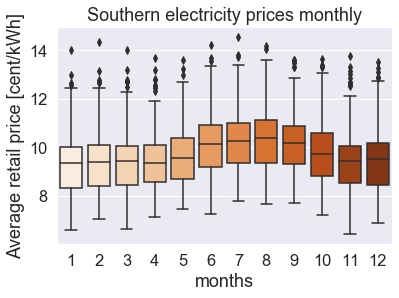

In [497]:
plt.title('Southern electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = South_df, palette="Oranges") 
plt.ylabel("Average retail price [cent/kWh]")

In [597]:
mod = ols("value~months",data=South_df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
months,1.0,44.992315,44.992315,27.483381,1.708215e-07
Residual,2674.0,4377.534567,1.637074,NaN,NaN


In [598]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     27.48
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           1.71e-07
Time:                        13:13:48   Log-Likelihood:                -4455.6
No. Observations:                2676   AIC:                             8915.
Df Residuals:                    2674   BIC:                             8927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5015      0.052    181.547      0.000       9.399       9.604
months         0.0377      0.007      5.242      0.000       0.024       0.052
==============================================================================
Omnibus:                      104.413   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.300
Skew:                           0.490   Prob(JB):                     5.57e-26
Kurtosis:                       3.285   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [667]:
print(pairwise_tukeyhsd(South_df['value'], South_df['months']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.1039    0.9 -0.2736  0.4815  False
     1      3   0.0935    0.9 -0.2841  0.4711  False
     1      4    0.122    0.9 -0.2556  0.4996  False
     1      5   0.3347 0.1411 -0.0429  0.7123  False
     1      6   0.8265  0.001  0.4489   1.204   True
     1      7   0.9866  0.001   0.609  1.3642   True
     1      8   1.0339  0.001  0.6511  1.4167   True
     1      9   0.8463  0.001  0.4635  1.2291   True
     1     10    0.478 0.0027  0.0952  0.8608   True
     1     11   0.1355    0.9 -0.2473  0.5183  False
     1     12   0.1414    0.9 -0.2414  0.5242  False
     2      3  -0.0104    0.9  -0.388  0.3672  False
     2      4    0.018    0.9 -0.3596  0.3956  False
     2      5   0.2308 0.6687 -0.1468  0.6084  False
     2      6   0.7225  0.001  0.3449  1.1001   True
     2      7   0.8827  0.001  0.5051  1.2603 

Monthly changes of prices in **NW States**

Text(0, 0.5, 'Average retail price [cent/kWh]')

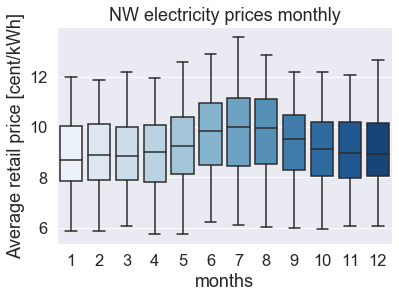

In [500]:
# N_W_df.boxplot(by='months')
plt.title('NW electricity prices monthly')
plt.suptitle("")
sns.boxplot(x = 'months', y = 'value', data = N_W_df, palette="Blues") 
plt.ylabel("Average retail price [cent/kWh]")

In [599]:
mod = ols("value~months",data=N_W_df).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
months,1.0,19.115610,19.115610,8.660275,0.003294
Residual,1782.0,3933.364209,2.207275,NaN,NaN


In [575]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.660
Date:                Fri, 04 Oct 2019   Prob (F-statistic):            0.00329
Time:                        12:41:55   Log-Likelihood:                -3236.6
No. Observations:                1784   AIC:                             6477.
Df Residuals:                    1782   BIC:                             6488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1127      0.074    122.434      0.000       8.967       9.259
months         0.0301      0.010      2.943      0.003       0.010       0.050
==============================================================================
Omnibus:                      170.565   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.197
Skew:                           0.166   Prob(JB):                     2.30e-13
Kurtosis:                       2.180   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
print(pairwise_tukeyhsd(N_W_df['value'], N_W_df['months']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.1092    0.9 -0.4362  0.6545  False
     1      3   0.1002    0.9 -0.4451  0.6456  False
     1      4   0.1147    0.9 -0.4307    0.66  False
     1      5   0.3839 0.4766 -0.1614  0.9293  False
     1      6   0.8688  0.001  0.3235  1.4142   True
     1      7   1.0121  0.001  0.4667  1.5574   True
     1      8   0.9402  0.001  0.3873  1.4931   True
     1      9    0.549 0.0536 -0.0038  1.1019  False
     1     10    0.248    0.9 -0.3048  0.8009  False
     1     11    0.206    0.9 -0.3468  0.7589  False
     1     12   0.2142    0.9 -0.3387   0.767  False
     2      3   -0.009    0.9 -0.5543  0.5364  False
     2      4   0.0055    0.9 -0.5399  0.5508  False
     2      5   0.2748 0.8884 -0.2706  0.8201  False
     2      6   0.7596  0.001  0.2143   1.305   True
     2      7   0.9029  0.001  0.3576  1.4483 

Additional check with MANOVA testing

In [563]:
df_for_manova = pd.DataFrame.merge(N_W_winter_summer_anova, NE_winter_summer_anova,
                        left_index=True, right_index=True)

In [565]:
df_for_manova = pd.DataFrame.merge(df_for_manova, S_winter_summer_anova,
                        left_index=True, right_index=True)
df_for_manova

,months_x,variable_x,value_x,season_x,months_y,variable_y,value_y,season_y,months,variable,value,season
5,6,WA,7.402661,summer,6,NY,16.601663,summer,6,AR,9.459761,summer
6,7,WA,7.750340,summer,7,NY,19.209254,summer,7,AR,9.372841,summer
7,8,WA,7.924179,summer,8,NY,18.383516,summer,8,AR,9.532194,summer
17,6,WA,8.328508,summer,6,NY,16.428838,summer,6,AR,8.357030,summer
18,7,WA,8.200158,summer,7,NY,17.526946,summer,7,AR,8.670776,summer
19,8,WA,8.114591,summer,8,NY,17.341551,summer,8,AR,8.670776,summer
29,6,WA,8.059267,summer,6,NY,17.861455,summer,6,AR,8.463625,summer
30,7,WA,8.115040,summer,7,NY,18.795661,summer,7,AR,8.714605,summer
31,8,WA,8.128984,summer,8,NY,18.712000,summer,8,AR,8.617002,summer
41,6,WA,7.605742,summer,6,NY,17.452462,summer,6,AR,8.379898,summer


In [571]:
import statsmodels.multivariate.manova as smanova
formula = 'value_x+value_y+value~months'
mod = sm.MANOVA.from_formula(formula, data=df_for_manova)
r = mod.mv_test()
print(r)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value   Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0121 3.0000 444.0000 12064.6761 0.0000
         Pillai's trace  0.9879 3.0000 444.0000 12064.6761 0.0000
 Hotelling-Lawley trace 81.5181 3.0000 444.0000 12064.6761 0.0000
    Roy's greatest root 81.5181 3.0000 444.0000 12064.6761 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
             months         Value  Num DF  Den DF  F Value Pr > F
-----------------------------------------------------------------
              Wilks' lambda 0.9540 3.0000 444.0000  7.1320 0.0001
             Pillai's trace 0.